# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 3</span>

### Exercise 03.1 <span style="color:red"> Plain vanilla option pricing </span>

Black-Scholes theory assumes that the time evolution of the asset price is stochastic and exhibits geometric Brownian motion (GBM) with constant risk-free interest rate $r$ and volatility $\sigma$.

Black-Scholes <span style="color:blue"> analytic solution </span> for the price at time t<T:
- European Call-option price:
$$ C\left[ S(t),t \right] = S(t) N(d_1) -K e^{-r(T-t)} N(d_2) $$
- European Put-option price:
$$ P\left[ S(t),t \right] = S(t) \left[ N(d_1)-1\right] -K e^{-r(T-t)} \left[ N(d_2)-1\right]$$

where 
$$d_1 = \frac{1}{\sigma\sqrt{T-t}}\left[ \ln \left( \frac{S(t)}{K} \right) + \left( r+\frac{\sigma^2}{2} (T-t) \right)\right]$$

where $d_2 = d_1 - \sigma\sqrt{T-t}$, and where
$$ N(x) = \int_{-\infty}^{x} dz \, e^{-\frac{z^2}{2}} = \frac{1}{2} \left[ 1+ {\rm erf} \left( \frac{x}{\sqrt{2}}\right) \right]$$
is the cumulative of Gaussian $\sim \mathcal{N}(\mu=0,\sigma^2=1)$,
and where
$${\rm erf}(x) = \frac{2}{\sqrt{\pi}}\int_{0}^{x} dz \, e^{-z^2}$$

By using the following parameters: 
- asset price at $t=0$: $S(0)=100$
- delivery time: $T=1$
- strike price: $K=100$
- risk-free interest rate: $r=0.1$
- volatility: $\sigma=0.25$

compute at time $t=0$ **via Monte Carlo** the European call-option price, $C[S(0),0]$, and put-option price, $P[S(0),0]$:

1. <span style="color:red"> By sampling **directly** the final asset price $S(T)$</span> for a $GBM(r,\sigma^2)$
2. <span style="color:red"> By sampling the discretized $GBM(r,\sigma^2)$ path of the asset price</span> 
dividing $[0,T]$ in $10^2$ time intervals: $S(0)$, $S(t_1)$, $S(t_2)$, ... up to $S(t_{100}=T=1)$

<p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5">
    Remember that given an asset price $S\sim GBM(\mu,\sigma^2)$, with initial value $S(0)$, then
    $$S(t) = S(0) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)t+\sigma W(t)\right]$$
    where $W(t)\sim\mathcal{N}(0,t)$.
    Moreover, since the increments of $W$ are independent and normally distributed, the simple recursive procedure for sampling discretized values of $S\sim GBM(\mu,\sigma^2)$ at $t_1 < t_2 < … < t_n$ is:
$$S(t_{i+1}) = S(t_i) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)(t_{i+1}-t_i)
    +\sigma Z_{i+1}\sqrt{t_{i+1}-t_i}\right]$$
    with $Z_i \sim \mathcal{N}(0,1)$
</p>

<span style="color:red">Make four pictures for the estimation of the European call-option prices, $C[S(0),0]$ (direct and discretized), and put-option prices, $P[S(0),0]$ (direct and discretized), with their uncertainties </span> with a large number of asset prices at time $t=T$, say $M\ge 10^4$, as a function of the number of blocks, $N$</font>. <span style="color:blue"> As usual, in computing statistical uncertainties, use data blocking.</span>

### For comparison, Black-Scholes analytic solution:

In [29]:
import scipy
from scipy.special import erf
import numpy
from numpy import exp
from numpy.lib.scimath import log, sqrt

# data
S0 = 100.
K = 100.
T = 1.
r = 0.1
sigma = 0.25
t=0

def N(x):
    return 0.5 * (1. + erf(x / sqrt(2.)))

def black_scholes(S0, K, T, r, sigma):
    d1 = 1./(sigma * sqrt(T)) * (log(S0 / K) + (r + (sigma**2) / 2.) * T)
    d2 = d1 - sigma * sqrt(T)
    C = S0 * N(d1) - K * exp(-r * T) * N(d2)
    P = S0 *(N(d1) - 1.) - K * exp(-r * T) * (N(d2)-1.)
    return C, P

if __name__ == "__main__":
    call, put = black_scholes(S0, K, T, r, sigma)
    print(" == BLACK-SCHOLES ==")
    print("call: ", call)
    print("put: ", put)

 == BLACK-SCHOLES ==
call:  14.975790778311286
put:  5.4595325819072364


## **SUBMISSION**

In order to evaluate European Call/Put - option prices, as proposed by *Black-Scholes theory*, I had to sort a **Geometric Brownian Motion (GBM)**: a **Wiener process** similar to a Brownian motion, which allows positive values only. I created a class `GBM` which has a method `step`:
```cpp
//return x_i+1 for a geometric brownian motion with constant mu and sigma
double GBM :: step(double x_i,double t_ii,double t_i,double mu,double sigma){
    double x_ii=x_i*exp((mu-0.5*pow(sigma,2))*(t_ii-t_i)+sigma*m_rand.Gauss(0,1)*sqrt(t_ii-t_i));
    return x_ii;
}
```

This method requires the parameters $\mu=r$ (risk-free interest rate) and $\sigma$ (volatility). Given the initial position $x_i$, the initial time $t_i$ and the final time $t_{ii}$, it performs the step. This method can be used for both the direct and the discrete sampling.

Once implemented this class I used it to evaluate call-option and put-option prices described as the profit multiplied by $e^{-r\,T}$:
* Direct sampling: 
```cpp 
    for(int i=0; i<N*M; i++){
        //direct step
        double S_T= gbm.step(S_0,t,0,r,sigma);
        //direct calculation of C(T) and P(T)
        double max=0;
        double min=0;
        if(S_T-K>0){
            max=S_T-K;
        }
        if(S_T-K<0){
            min=K-S_T;
        }
        C+=exp(-r)*max/M;
        P+=exp(-r)*min/M;
```
* Discrete sampling:
```cpp
    for(int i=0; i<N*M; i++){
        //discrete step
        double S_i=S_0;
        for(int i=0;i<100;i++){
            S_i=gbm.step(S_i,(i+2)/100,(i+1)/100,r,sigma);
        }
        //discrete calculation of C(T) and P(T)
        double max_d=0;
        double min_d=0;
        if(S_i-K>0){
            max_d=S_i-K;
        }
        if(S_i-K<0){
            min_d=K-S_i;
        }
        C_d+=exp(-r)*max_d/M;
        P_d+=exp(-r)*min_d/M;
```

For both I computed blocking average with $50000$ different realizations of $C$ and $P$ over $100$ blocks.
The figures show that with **discrete sampling** the **gain in accuracy and precision and convergence velocity** is higher than with direct sampling. In fact, for both call and put option prices with discrete sampling, the true value is within $1$ $\sigma$ of the simulated value, which does not occur with direct sampling.

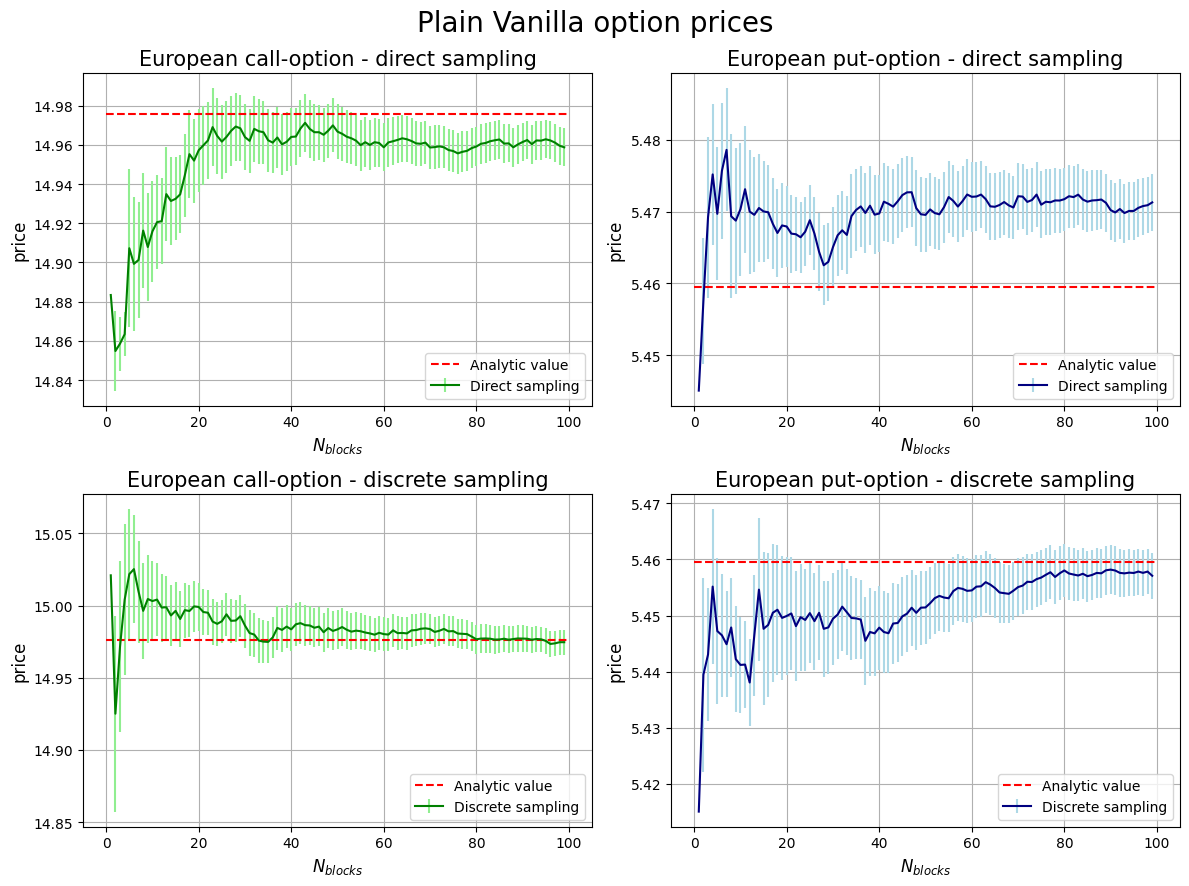

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

direct=pd.read_csv("results_3_1_direct.csv")
discrete=pd.read_csv("results_3_1_discrete.csv")

fig=plt.figure(figsize=(12,9))
ax1=fig.add_subplot(2,2,1)
ax1.errorbar(x=direct.index+1,y=direct['call'], yerr=direct['err_call'],color='green',ecolor='lightgreen',label="Direct sampling")
ax1.grid(True)
ax1.set_xlabel(r"$N_{blocks}$",fontsize=12)
ax1.set_ylabel(r"price",fontsize=12)
ax1.hlines(14.97579,xmin=0,xmax=100,linestyles="--",color="red",label="Analytic value")
ax1.legend(loc='lower right')
ax1.set_title(r"European call-option - direct sampling",fontsize=15)


ax2=fig.add_subplot(2,2,2)
ax2.errorbar(x=direct.index+1,y=direct['put'], yerr=direct['err_put'],color='navy',ecolor='lightblue',label="Direct sampling")
ax2.grid(True)
ax2.set_xlabel(r"$N_{blocks}$",fontsize=12)
ax2.set_ylabel(r"price",fontsize=12)
ax2.hlines(5.4595326,xmin=0,xmax=100,linestyles="--",color="red",label="Analytic value")
ax2.legend(loc='lower right')
ax2.set_title(r"European put-option - direct sampling",fontsize=15)


ax3=fig.add_subplot(2,2,3)
ax3.errorbar(x=direct.index+1,y=discrete['call'], yerr=discrete['err_call'],color='green',ecolor='lightgreen',label="Discrete sampling")
ax3.grid(True)
ax3.set_xlabel(r"$N_{blocks}$",fontsize=12)
ax3.set_ylabel(r"price",fontsize=12)
ax3.hlines(14.97579,xmin=0,xmax=100,linestyles="--",color="red",label="Analytic value")
ax3.legend(loc='lower right')
ax3.set_title(r"European call-option - discrete sampling",fontsize=15)


ax4=fig.add_subplot(2,2,4)
ax4.errorbar(x=direct.index+1,y=discrete['put'], yerr=discrete['err_put'],color='navy',ecolor='lightblue',label="Discrete sampling")
ax4.grid(True)
ax4.set_xlabel(r"$N_{blocks}$",fontsize=12)
ax4.set_ylabel(r"price",fontsize=12)
ax4.hlines(5.4595326,xmin=0,xmax=100,linestyles="--",color="red",label="Analytic value")
ax4.legend(loc='lower right')
ax4.set_title(r"European put-option - discrete sampling",fontsize=15)


plt.suptitle(r"Plain Vanilla option prices",fontsize=20)
plt.tight_layout()
plt.show()